# **Introduction**
Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.



# Business Understanding
Vodafone is a leadng telecommunication company in Europe and Africa, led by their mission to connect for a better future(Vodafone, 2023).Vodafone Corporation aims to reduce customer churn and improve retention strategies by leveraging the past behaviour and patterns of their customers. The primary objective is to accurately predict the likelihood of customer churn based on historical data and identify the key indicators that drive churn behavior. By understanding the factors influencing churn, Vodafone aims to proactively implement targeted retention strategies to mitigate customer attrition. The marketing and sales teams are eager to receive actionable insights and recommendations that will enable them to develop personalized retention campaigns and enhance customer satisfaction. The project's success will be measured by the reduction in churn rate, improved customer retention, and increased customer loyalty. The available resources include a comprehensive dataset provided by the marketing and sales teams, a designated budget for analysis and model development, and a timeline of one month for the completion of the project. The findings will be presented to the business development unit, marketing, and sales teams, with the expectation that the insights will guide strategic decision-making and contribute to Vodafone's overall growth and profitability.

# Hypothesis
Null Hypothesis: There is no significant relationship between the customer's internet service provider and their likelihood of churn

Alterntive Hypothesis : There is a significant relationship between the Customer's internet service provider and their likelihood of churn


# Questions
1. What is the overall churn rate?
2. Is there a relationship between the tenure of a customer and their likelihood of churn?
3. Does the type of internet service influence customer churn?
4. Is there a correlation between the customer's payment method and churn rate?
5. Does the presence of paperless billing affect customer churn?

# Data Understanding
The first dataset consisted of the first 3000 records of the companies customer churn data. The dataset was stored in a remote database and to access this dataset, a connection to the Microsoft SQL Server database using an Open Database Connectivity (ODBC) library such as pyodbc or an Object-Relational Mapping (ORM) library like SQLAlchemy needed to be established. This allowed for querying the database and retrieving the first 3000 records.

THe second dataset is a csv file, with 2000 records.
THe third dataset is the test dataset.
The column description of this datasets is:
The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)


# Installation

In [1]:
#For creating a connection with the remote database
!pip install  pyodbc


In [2]:
#For balancing the data
!pip install imbalanced-learn

In [3]:
#Package to create a connection string to the database
!pip install  pyodbc

In [4]:
#Package for creating environment variables 
!pip install python-dotenv

# Importations

In [6]:
# import the necessary packages you need
#Data handling
import pyodbc
import pandas as pd
import numpy as np

#For creating connection
import pyodbc

#For loading environment variables
from dotenv import dotenv_values
import dotenv


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stat
import scipy.stats as stats
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)


#Imputing missing values library
from sklearn.impute import SimpleImputer

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE


# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

#Exporting Key Components
import pickle



## Data Reading

In [7]:
#Test dataset

test = pd.read_excel('Test.xlsx')
#THe first set of data set

#The first set of dataset
file_url ='https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-last-2000.csv'
# Read the file into a DataFrame
data1 = pd.read_csv(file_url)

In [8]:
#Reading the second set of the dataset from a remote database

# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Getting the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [9]:
#Using connect method of the pyodbc library to pass in the connection string to connect to the server

connection = pyodbc.connect(connection_string)

In [10]:
# A query to get the data form the database

query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)


In [11]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
data.shape

(3000, 21)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
# You can concatenate this with other DataFrames to get one data set 
train = pd.concat([data, data1])
train.to_csv('telco_churn.csv')

In [15]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [16]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [17]:
#THe number of rows and data types of each rows in the combined dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


The combined dataser has 5043 rows and 20 columns. All the columns are object data type except for the tenure and MonthlyCharges. Some of the columns have got missing values.

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


THe test dataset has 2000 rows and 20 columns. The target column, Churn is not in the dataset.

In [19]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


For the tenure column:

The average tenure is approximately 32.58 months, indicating that, on average, customers have been with the company for around 2.7 years.
The standard deviation is relatively high (24.53), suggesting that there is a wide variation in customer tenure. This could indicate that there are both long-term and short-term customers in the dataset.
The median value (50th percentile) of 29 months suggests that half of the customers have been with the company for less than 2.5 years.
The maximum tenure of 72 months suggests the presence of long-term customers who have been with the company for the entire duration of the dataset.

For Monthly Charges Column:

The average monthly charge is approximately 65.09, which shows the average amount that customers are billed per month.
The highest amount charged to a customer is 118.65 and the minimum is 18.4
A quarter of the customers have relatively low monthly charges, that is below 35.77.half of the customers have a monthly charge below 71 and three-quarters of the customers have monthly charges below 90.05.

In [20]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


In [21]:
#Checking for duplicates in the train dataset
train.duplicated().sum()

0

In [22]:
#Checking for duplicates in the test data set
test.duplicated().sum()

0

In [23]:
#Missing values in the train dataset
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [24]:
#Missing values in the test dataset
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

THe test dataset does not have any missing values. However, the data types for some of it columns are not correct, and when changed, they might reveal some missing values.

In [26]:
#Checking for columns in the train dataset
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
#The number each of the categories occurs
print('The categories in the OnlineSecurity column are: ')
print(train['OnlineSecurity'].value_counts())

print('\n The categories in the gender column are: ')
print(train['gender'].value_counts())

print('\n The columns in the SeniorCitizen column are: ')
print(train['SeniorCitizen'].value_counts())

print('\n The categories in the partner column are: ')
print(train['Partner'].value_counts())

print('\n The categories in the paymentmethod column are: ')
print(train['PaymentMethod'].value_counts())

print('\n The categories in the contract column are: ')
print(train['Contract'].value_counts())

print('\n The categories in the StreamingMovies column are: ')
print(train['StreamingMovies'].value_counts())

print('\n The categories in the Techsupport column are: ')
print(train['TechSupport'].value_counts())

print('\n The categories in the paperless billing column are: ')
print(train['PaperlessBilling'].value_counts())

print('\n The categories in the streamming tv column are: ')
print(train['StreamingTV'].value_counts())

print('\n The categories in the device protection column are: ')
print(train['DeviceProtection'].value_counts())

The categories in the OnlineSecurity column are: 
False                  1478
No                     1029
True                    871
Yes                     585
No internet service     429
Name: OnlineSecurity, dtype: int64

 The categories in the gender column are: 
Male      2559
Female    2484
Name: gender, dtype: int64

 The columns in the SeniorCitizen column are: 
False    4224
True      819
Name: SeniorCitizen, dtype: int64

 The categories in the partner column are: 
False    1538
True     1462
No       1047
Yes       996
Name: Partner, dtype: int64

 The categories in the paymentmethod column are: 
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: PaymentMethod, dtype: int64

 The categories in the contract column are: 
Month-to-month    2744
Two year          1244
One year          1055
Name: Contract, dtype: int64

 The categories in the StreamingMovies column are: 
True             

In [28]:
#The number each of the categories occurs in the test dataset
print('The categories in the OnlineSecurity column for test dataset are: ')
print(test['OnlineSecurity'].value_counts())

print('\n The categories in the gender column for test dataset are: ')
print(test['gender'].value_counts())

print('\n The columns in the SeniorCitizen column for test dataset are: ')
print(test['SeniorCitizen'].value_counts())

print('\n The categories in the partner column for test dataset are: ')
print(test['Partner'].value_counts())

print('\n The categories in the paymentmethod column for test dataset are: ')
print(test['PaymentMethod'].value_counts())

print('\n The categories in the contract column for test dataset are: ')
print(test['Contract'].value_counts())

print('\n The categories in the StreamingMovies column for test dataset are: ')
print(test['StreamingMovies'].value_counts())

print('\n The categories in the Techsupport column for test dataset are: ')
print(test['TechSupport'].value_counts())

print('\n The categories in the paperless billing column for test dataset are: ')
print(test['PaperlessBilling'].value_counts())

print('\n The categories in the streamming tv column for test dataset are: ')
print(test['StreamingTV'].value_counts())

print('\n The categories in the device protection column for test dataset are: ')
print(test['DeviceProtection'].value_counts())

The categories in the OnlineSecurity column for test dataset are: 
No                     991
Yes                    563
No internet service    446
Name: OnlineSecurity, dtype: int64

 The categories in the gender column for test dataset are: 
Female    1004
Male       996
Name: gender, dtype: int64

 The columns in the SeniorCitizen column for test dataset are: 
0    1677
1     323
Name: SeniorCitizen, dtype: int64

 The categories in the partner column for test dataset are: 
No     1056
Yes     944
Name: Partner, dtype: int64

 The categories in the paymentmethod column for test dataset are: 
Electronic check             665
Mailed check                 484
Credit card (automatic)      432
Bank transfer (automatic)    419
Name: PaymentMethod, dtype: int64

 The categories in the contract column for test dataset are: 
Month-to-month    1131
Two year           451
One year           418
Name: Contract, dtype: int64

 The categories in the StreamingMovies column for test dataset are: 
N

In [29]:
#The number of categories in the target column
train['Churn'].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

The responses should only be either Yes or No. In this case, True means Yes, while False means No.

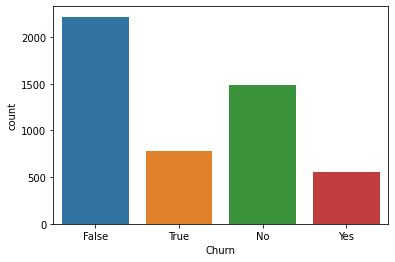

In [30]:
#THe distribution of the categories in the Churn column
sns.countplot(x='Churn', data=train)
plt.show()

True and Yes represent the customers that Churned while False and No represent the customer who did not Churn. 

<function matplotlib.pyplot.show(close=None, block=None)>

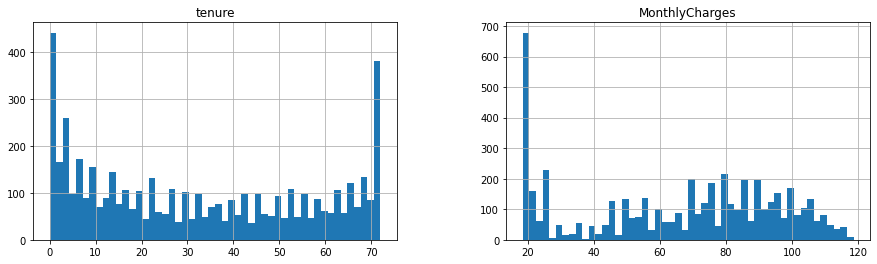

In [31]:
train.hist(bins=50, figsize = (15,4))
plt.show

The histogram indicates a non-linear distribution of values for the tenure column. It suggests that there are concentrations of values at both ends of the range, with fewer values in the middle.
For the Monthly Charges column, it shows that the values are slightly right skewed.

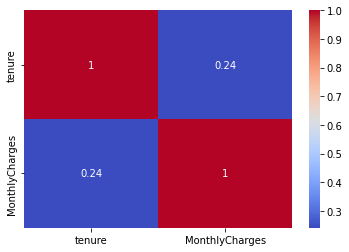

In [32]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

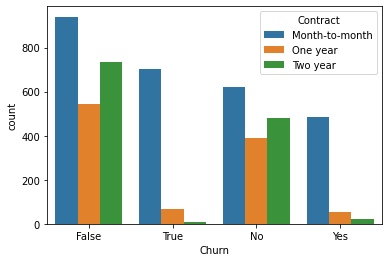

In [33]:
#Churn report based on the type of contract
sns.countplot(x='Churn', data=train, hue='Contract')
plt.show()

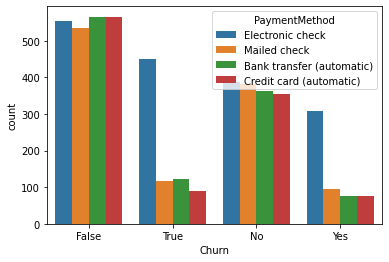

In [34]:
#Churn report based on the payment method used
sns.countplot(x='Churn', hue='PaymentMethod', data=train)
plt.show()

The graph shouls the different payment methods and whether they churned or not.

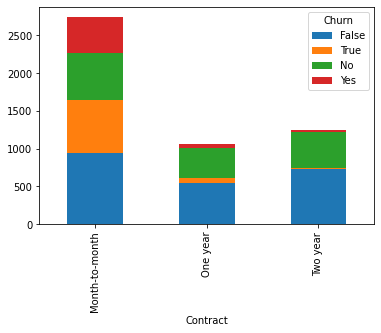

In [35]:
#A stacked bar plot of Churn and Contract
cross_tab = pd.crosstab(train['Contract'], train['Churn'])
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [36]:
# Cross-tabulate Churn and SeniorCitizen
cross_tab = pd.crosstab(train['Churn'], train['SeniorCitizen'])
print(cross_tab)

SeniorCitizen  False  True
Churn                     
False           1936   283
True             588   192
No              1291   196
Yes              408   148


## Data Cleaning

In [37]:
#Drop the unnecesary columns
train.drop('customerID', axis=1, inplace=True)
test.drop('customerID', axis=1, inplace=True)


In [38]:
#Replacing True/False into Yes and No respectively in the Churn Column
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("True","Yes"))
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("False","No"))
#WE replace None with No, which is the mode 
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("None","No"))

#We replace even for the Online securit column
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("True","Yes"))
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("False","No"))
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("No internet service","No"))
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("None","No"))


#Replace for the Partner Column
train['Partner'] = train['Partner'].apply(lambda x:str(x).replace("True","Yes"))
train['Partner'] = train['Partner'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the Streaming movies column
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("True","Yes"))
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the tech support column
train['Techsupport'] = train['TechSupport'].apply(lambda x:str(x).replace("True","Yes"))
train['Techsupport'] = train['Techsupport'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the multiple lines column
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("True","Yes"))
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("False","No"))
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("None","No"))
#Replacing for the device protection column
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("True","Yes"))
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("False","No"))
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("None","No"))
#Replacing for the tech support column
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("True","Yes"))
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("False","No"))
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("None","No"))
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("No internet service","No"))

#Replacing for the Streaming TV column
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("True","Yes"))
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("False","No"))
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("No internet service","No"))
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("None","No"))



train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("None","No"))
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("No internet service","No"))

#Replacing for the paperless billing column
train['PaperlessBilling'] = train['PaperlessBilling'].apply(lambda x:str(x).replace("True","Yes"))
train['PaperlessBilling'] = train['PaperlessBilling'].apply(lambda x:str(x).replace("False","No"))

#Converting false and true into 0 and one respectively for the senior citizen column
train['SeniorCitizen'] = train['SeniorCitizen'].apply(lambda x:str(x).replace("True","1"))
train['SeniorCitizen'] = train['SeniorCitizen'].apply(lambda x:str(x).replace("False","0"))

train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("No internet service","No"))
#Replacing for the Dependents column
train['Dependents'] = train['Dependents'].apply(lambda x:str(x).replace("True","Yes"))
train['Dependents'] = train['Dependents'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the Dependents column
train['PhoneService'] = train['PhoneService'].apply(lambda x:str(x).replace("True","Yes"))
train['PhoneService'] = train['PhoneService'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the Dependents column
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("No phone service","No"))
#Replacing for the Online backup column
train['OnlineBackup'] = train['OnlineBackup'].apply(lambda x:str(x).replace("True","Yes"))
train['OnlineBackup'] = train['OnlineBackup'].apply(lambda x:str(x).replace("False","No"))
train['OnlineBackup'] = train['OnlineBackup'].apply(lambda x:str(x).replace("No internet service","No"))

In [39]:
#Columns in the test dataset
test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [40]:
#Columns in the train dataset
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Techsupport'],
      dtype='object')

In [41]:
train['TechSupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
2038    Yes
2039     No
2040     No
2041     No
2042    Yes
Name: TechSupport, Length: 5043, dtype: object

In [42]:
train['Techsupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
2038    Yes
2039     No
2040     No
2041     No
2042    Yes
Name: Techsupport, Length: 5043, dtype: object

In the train dataset, there are two Techsupport columns. Both TechSupport and Techsupport columns in the train dataset have the same values.We drop one of the column

In [43]:
#Dropping one of the techsupport column
train.drop('Techsupport', axis=1, inplace=True)


In [44]:
#Replace inconsistent values in the test dataset
test['OnlineSecurity'] = test['OnlineSecurity'].apply(lambda x:str(x).replace("No internet service","No"))
test['TechSupport'] = test['TechSupport'].apply(lambda x:str(x).replace("No internet service","No"))
test['StreamingTV'] = test['StreamingTV'].apply(lambda x:str(x).replace("No internet service","No"))
test['StreamingMovies'] = test['StreamingMovies'].apply(lambda x:str(x).replace("No internet service","No"))
test['DeviceProtection'] = test['DeviceProtection'].apply(lambda x:str(x).replace("No internet service","No"))


In [45]:
#CHange the data type of the Total Charges column
train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan)
#COnvert The total charges column into float
train["TotalCharges"]=train.TotalCharges.apply(lambda x:float(x))

In [46]:
#Change the data type of the Total charges column in the test data set
test['TotalCharges'] = test['TotalCharges'].replace(' ', np.nan)
#COnvert The total charges column into float
test["TotalCharges"]=test.TotalCharges.apply(lambda x:float(x))

In [47]:
#Change the data type of the Senior Citizen column
train["SeniorCitizen"]=train.SeniorCitizen.apply(lambda x:int(x))

In [48]:
#Custom rule check for the Senior Citizen Column
with pd.option_context('display.max_rows',None,):
    print(train['SeniorCitizen'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      1
31      1
32      0
33      0
34      1
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      0
52      1
53      1
54      1
55      1
56      0
57      1
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      1
73      0
74      0
75      1
76      0
77      0
78      1
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      1


In [49]:
#Checking for missing values
train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [50]:
#The percentage of the missing values
(train.isna().sum()*100)/ len(train)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.158636
Churn               0.000000
dtype: float64

## Imputing the Missing Values

In [51]:
#Imputing the numerical columns using mean
numerical_imputer = SimpleImputer(strategy='mean')

In [52]:
#Numerical Columns
numerical_columns = ['tenure', 'TotalCharges']


In [53]:
#Imputing the numerical columns in the train dataset
for column in numerical_columns:
    train[column] = numerical_imputer.fit_transform(train[column].values.reshape(-1, 1))


In [54]:
#To Impute the Categorical columns
#categorical_imputer = SimpleImputer(strategy='most_frequent')
#categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
#for column in categorical_columns:
 #   train[column] = categorical_imputer.fit_transform(train[column].values.reshape(-1, 1))

In [55]:
# Handling missing values in 'MultipleLines' column
train['MultipleLines'].fillna('No', inplace=True)

# Handling missing values in 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
# 'StreamingTV', and 'StreamingMovies' columns
train['OnlineSecurity'].fillna('No', inplace=True)
train['OnlineBackup'].fillna('No', inplace=True)
train['DeviceProtection'].fillna('No', inplace=True)
train['TechSupport'].fillna('No', inplace=True)
train['StreamingTV'].fillna('No', inplace=True)
train['StreamingMovies'].fillna('', inplace=True)
train['Churn'].fillna('No', inplace=True)


In [56]:
train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   float64
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   int64  
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


## Exploratory Data Analysis

## Univariate Analysis

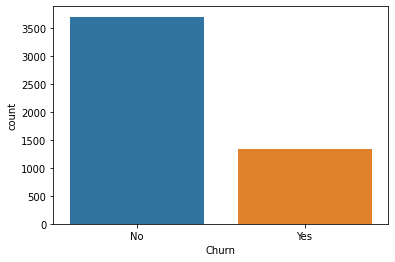

In [59]:
#The distribution of the target variable
sns.countplot(x='Churn', data=train)
plt.show()

The distribution shows that the number of customers who said No is greater than those who said Yes, which suggests that a larger proportion of customers in the dataset did not churn.
The higher number of customers who said "No" to churn indicates a relatively higher retention rate within the dataset. This suggests that a significant portion of customers did not terminate their services during the observed period.
However, the higher number of the customers who churned indicates that efforts should be directed towards enhancing customer retention measures, targeting the specific needs and concerns of customers who are more likely to churn

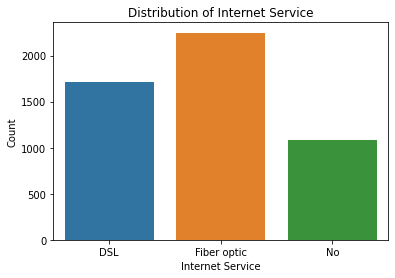

In [60]:
#The distribution of Internet Service
sns.countplot(x='InternetService', data=train)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')
plt.show()

From the graph, it appears that the majority of people in the dataset have Fiber optic as their internet service provider. This is indicated by the higher count or frequency of the "Fiber optic" category compared to other categories.
The second most common internet service provider is DSL (Digital Subscriber Line), which has a lower count compared to Fiber optic but still represents a significant portion of the dataset.

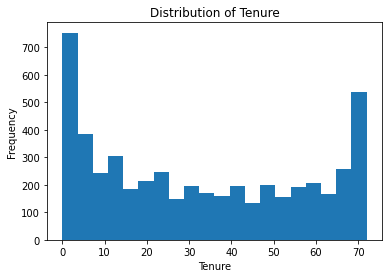

In [61]:
# Plot a histogram for 'tenure'
plt.hist(train['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

The histogram shows that there are relatively high frequencies of customers at the beginning and end of their tenure periods, with lower frequencies in the middle.
The middle curve, may indicate a potential period where customers are more likely to churn or transition to different services.

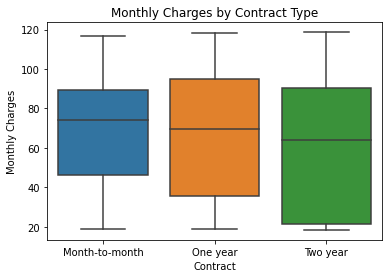

In [62]:
#distribution of monthly charges across different contract types.
sns.boxplot(x='Contract', y='MonthlyCharges', data=train)
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Contract Type')
plt.show()

The median monthly charge for a customer with a month-to-month contract, is 75, while the one for a one-year contract is 70, and for a two year contract is approximately 65. A two year contract has a wider distribution of charges followed by a one year contract and then a month to month contract.

# Bivariate and Multivariate Analysis

## Questions

### 1. What is the overall churn rate?

In [63]:
# Count the number of churned customers
churned_customers = train[train['Churn'] == 'Yes'].shape[0]

# Count the total number of customers
total_customers = train.shape[0]

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Print the churn rate
print("Overall churn rate: {:.2f}%".format(churn_rate))

Overall churn rate: 26.49%


The overall churn rate in the dataset is 26.49%. This means that approximately 26.49% of the customers in the dataset have churned, while the remaining 73.51% have not churned.

### 2. Is there a relationship between the tenure of a customer and their likelihood of churn?

In [64]:
#Grouping the data by tenure
tenure_groups = pd.cut(train['tenure'], bins=[0, 12, 24, 36, 48, 60, 72])
churn_by_tenure = train.groupby(tenure_groups)['Churn'].value_counts(normalize=True).unstack()
#Calculating the churn rate for each tenure group
churn_rate_by_tenure = churn_by_tenure['Yes']


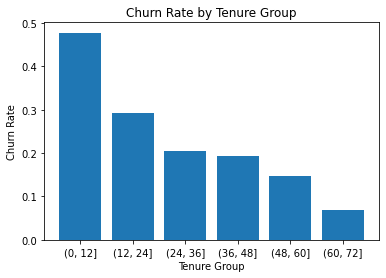

In [65]:
#Plotting the relationship
x = churn_rate_by_tenure.index.astype(str)
y = churn_rate_by_tenure.values

plt.bar(x, y)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Group')
plt.show()


The Churn rate is decreasing as tenure increases, this suggests that customers with longer tenures are less likely to churn. Therefore, as customers stay with the company for a longer period of time, their likelihood of churn decreases.
This decreasing trend can be seen as a positive sign for the company, as it indicates that customer loyalty tends to increase with longer tenures. This implies that customers who have been with the company for a while are more satisfied with the services or products provided, and are less likely to switch to a competitor.

### 3. Does the type of internet service influence customer churn?

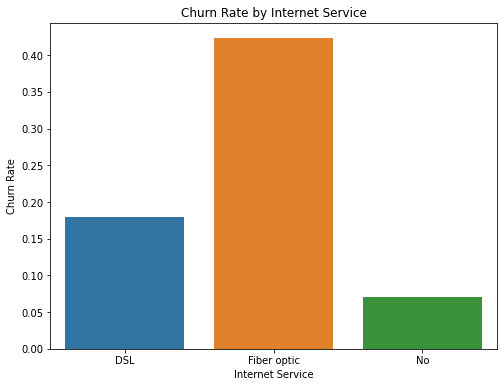

In [66]:
# Group the data by InternetService and calculate churn rate
churn_by_internet_service = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_by_internet_service = churn_by_internet_service.loc[:, 'Yes']

# Plotting the churn rates for each internet service category
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values)
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service')
plt.show()


Based on the graph above, it can be observed that customers who had fiber optic internet service had the highest churn rate, followed by those who had DSL, and the lowest churn rate was among those who did not have internet services.
This could be due to the Service Quality of the Internet service. Fiber optic internet service is typically associated with higher speeds and better performance compared to DSL. However, if the quality of the fiber optic service provided by the telecom company is not up to the customers' expectations or if there are frequent disruptions or outages, it could lead to customer dissatisfaction and ultimately churn.
In addition, the high churn rate by the people using fiber optic could be due to the pricig. Fiber optic internet service is often priced higher than DSL, which may attract customers initially due to the perceived benefits of faster speeds. However, if customers feel that the higher cost does not justify the value they are receiving or if they find alternative providers offering similar services at a lower price, they may choose to switch and churn.
FOr the low churn rate by customers with no internet service could be due to the customers having access to alternative internet sources like public Wi-Fi or using mobile data. Since they are not relying on the telecom company for internet services, they may have lower churn rates.


## 4. Is there a correlation between the customer's payment method and churn rate?

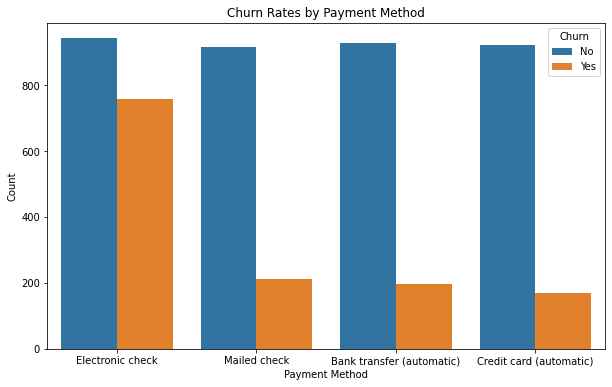

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=train)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Rates by Payment Method')
plt.show()


Based on the graph of the churn rates by payment method, it appears that there is a correlation between the customer's payment method and churn rate.

Among the customers who churned, the highest number of churned customers used the electronic check as their payment method, followed by those who used the mailed check. This indicates that customers who use electronic check may have a higher likelihood of churning compared to other payment methods.

On the other hand, customers who used bank transfer (automatic) or credit card (automatic) as their payment method had relatively lower churn rates compared to those using electronic check or mailed check.

### 5. Does the presence of paperless billing affect customer churn?

In [68]:
churn_by_paperless = train.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
churn_by_paperless.transpose()

PaperlessBilling,No,Yes
Churn,,
No,0.8383,0.664553
Yes,0.1617,0.335447


The presence of paperless billing affects the customer churn. This is because the number of customers who have paperless billing (Yes) have a higher churn rate (33.54%) compared to those who do not have paperless billing (No) with a churn rate of 16.17%. This suggests that customers who opt for paperless billing are more likely to churn compared to those who prefer traditional billing methods.

## Hypothesis Testing

Null Hypothesis: There is no significant relationship between the customer's internet service provider and their likelihood of churn

Alterntive Hypothesis : There is a significant relationship between the Customer's internet service provider and their likelihood of churn

In [69]:
# Create the contingency table
contingency_table = [[0.8383, 0.664553], [0.1617, 0.335447]]

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Compare the p-value with the significance level
if p_value < 0.05:
    print("There is a significant relationship between the customer's internet service provider and their likelihood of churn.")
else:
    print("There is no significant relationship between the customer's internet service provider and their likelihood of churn.")


There is no significant relationship between the customer's internet service provider and their likelihood of churn.


We do not to reject the null hypothesis. This means that the customer's internet service provider is not a significant factor in determining their likelihood of churn.

## Feature Engineering

In [70]:
#We create a total charges column that  is based on the number of months of stay and the the monthly charges.
train['TotalCharges'] = train['tenure'] * train['MonthlyCharges']


<AxesSubplot:>

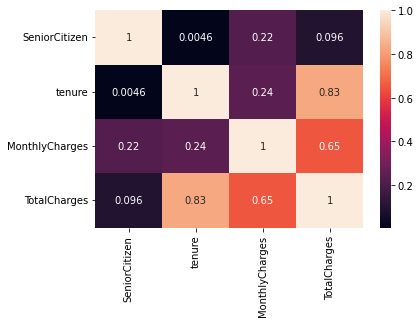

In [71]:
sns.heatmap(train.corr(),annot=True)

## Feature Encoding

In [72]:
#Encoding the target column
# Perform label encoding on 'Churn' column
label_encoder = LabelEncoder()
train['Churn'] = label_encoder.fit_transform(train['Churn'])

In [73]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   float64
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [75]:
# Dividing numerical and categorical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Subset of the numerical columns
train_num = train[numerical_columns]

# A subset of the categorical columns
train_cat = train[categorical_columns]
# Convert boolean columns to strings
train_cat = train_cat.astype(str)
#THe shape of each
train_num.shape,train_cat.shape

((5043, 5), (5043, 15))

In [76]:
#Numerical columns
print(f"The numerical columns in the train dataset are:",train_num.columns)

#Categorical columns
print(f"\nThe categorical columns in the train dataset are:",train_cat.columns)

The numerical columns in the train dataset are: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

The categorical columns in the train dataset are: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [77]:
#from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,drop='first',handle_unknown='error').set_output(transform='pandas')
encoder.fit(train_cat)
encoded_data = encoder.transform(train_cat)
#encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(),index=train_cat.index)
#encoded_df
encoded_data

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_None,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2039,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2041,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [78]:
encoded_data

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_None,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2039,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2041,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
encoded_data.shape

(5043, 20)

In [80]:
encoded_data.columns

Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_None',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [81]:
encoded_train = pd.concat([train_num, encoded_data], axis=1)
encoded_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0,29.850000,29.850000,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34.0,56.950001,1936.300026,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2.0,53.849998,107.699997,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45.0,42.299999,1903.499966,0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2.0,70.699997,141.399994,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,0,24.0,84.800000,2035.200000,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2039,0,72.0,103.200000,7430.400000,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2040,0,11.0,29.600000,325.600000,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2041,1,4.0,74.400000,297.600000,1,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Handling Imbalanced Data using SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning. In our dataset, the number of instances in the minority class (Churned) is much smaller than the number of instances in the majority class (those who did not churn). This can lead to poor performance of our machine learning models, as they tend to be biased towards the majority class.

The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples (Nababan et al., 2023).

In [82]:
# Splitting the dataset into features (X) and target variable (y)
X = encoded_train.drop('Churn', axis=1)

y = encoded_train['Churn'] #target column

In [83]:

#Cloning the class SMOTE and specifying the sampling strategy
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled= smote.fit_resample(X, y)

#Checking on the values
y_resampled.value_counts()

0    3707
1    3707
Name: Churn, dtype: int64

In [84]:
print(X_resampled.shape)
print(y_resampled.shape)


(7414, 24)
(7414,)


## Data Splitting

In [85]:
#from sklearn.model_selection import train_test_split
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)


In [86]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((5931, 24), (1483, 24), (5931,), (1483,))

### Scaling

In [87]:
#from sklearn.preprocessing import StandardScaler

# Cloning the standard scaler
#scaler = StandardScaler().set_output(transform='pandas')

# Columns to be scaled
#columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the selected columns in the training set
#X_train_scaled = X_train.copy()
#X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Transform the selected columns in the validation set
#X_eval_scaled = X_val.copy()
#X_eval_scaled[columns_to_scale] = scaler.transform(X_eval_scaled[columns_to_scale])
#X_eval_scaled = pd.DataFrame(X_eval_scaled, columns=X_val.columns)


In [88]:
#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")
# Columns to be scaled
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
#Fitting and transforming the selected columns in the training data set
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])

#Transforming the selected columns  in the evaluation dataset
X_eval_scaled=X_eval.copy() #TO create a copy
X_eval_scaled[columns_to_scale] = scaler.transform(X_eval[columns_to_scale])

In [89]:
#Checking on the scaled training set
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
969,0,-1.082286,0.971058,-0.855408,0.000000,0.0,0.000000,1.000000,1.0,1.0,...,0.000000,0.000000,1.000000,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0
7255,0,0.450656,-0.586215,-0.033545,0.000000,0.0,0.000000,0.034912,0.0,0.0,...,1.000000,0.000000,0.965088,1.0,0.000000,0.0,1.000000,0.000000,0.965088,0.0
6738,0,0.812993,1.463788,1.450463,1.000000,1.0,0.104654,1.000000,1.0,1.0,...,1.000000,0.895346,1.000000,1.0,0.895346,0.0,1.000000,0.895346,0.000000,0.0
5734,0,-1.124111,-0.674633,-0.921214,0.710243,0.0,0.710243,1.000000,0.0,0.0,...,0.710243,0.000000,0.000000,0.0,0.000000,0.0,0.289757,0.289757,0.710243,0.0
3918,0,1.301768,-1.698966,-0.414794,1.000000,1.0,1.000000,1.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.0


In [90]:
#To check on the scaled evaluation on the predictor set
X_eval_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
888,0,0.381607,0.803527,0.607515,1.0,1.0,1.000000,1.0,0.000000,1.0,...,0.0,0.0,1.000000,1.0,1.0,0.0,0.0,1.000000,0.0,0.0
3404,0,0.758036,0.958842,1.078929,0.0,0.0,0.000000,1.0,0.000000,1.0,...,1.0,0.0,1.000000,0.0,1.0,0.0,1.0,1.000000,0.0,0.0
6490,0,-0.472688,0.660198,-0.280540,0.0,1.0,0.425228,1.0,0.574772,1.0,...,1.0,0.0,0.425228,0.0,0.0,0.0,1.0,0.425228,0.0,0.0
1643,0,0.381607,0.773860,0.593058,1.0,1.0,0.000000,1.0,0.000000,1.0,...,1.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.000000,1.0,0.0
954,0,-0.245776,0.939646,0.018098,1.0,0.0,0.000000,1.0,1.000000,1.0,...,0.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.000000,1.0,0.0


### Modelling

In [91]:
# Defining a list of models that will be evaluated
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
]

# Initializing an empty dataframe that will store the evaluation scores
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

# Iterate over the models and train, evaluate, and store the results
for model_name, model in models:
    # Fitting the models to the training dataset
    model.fit(X_train_scaled, y_train)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_eval_scaled)

    # Calculate performance metrics
    
    accuracy = accuracy_score(y_eval, y_pred) #to calculate the accuracy
    precision = precision_score(y_eval, y_pred) #To calculate precision
    recall = recall_score(y_eval, y_pred) #To calculate recall
    f1 = f1_score(y_eval, y_pred) # To calculate fa score
    auc_roc = roc_auc_score(y_eval, y_pred) #To calculate AUC

    # Storing the results in the empty dataframe
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)



In [92]:
#Evaluation scores dataframe
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.768038,0.739445,0.827260,0.780892,0.768078
1,Random Forest,0.858395,0.869263,0.843455,0.856164,0.858385
2,Gradient Boosting,0.857047,0.856950,0.856950,0.856950,0.857046
3,Support Vector Machine,0.821308,0.812336,0.835358,0.823686,0.821318
4,Gaussian Naive Bayes,0.755226,0.719767,0.835358,0.773267,0.755280
5,K-Nearest Neighbors,0.776129,0.719656,0.904184,0.801435,0.776216
6,Decision Tree,0.819960,0.806202,0.842105,0.823762,0.819974
7,XGBoost,0.852326,0.857534,0.844804,0.851122,0.852321
8,LightGBM,0.855024,0.863260,0.843455,0.853242,0.855016


F1 score is measures a model's accuracy through combines the precision and recall scores of the model.It combines the precision and recall of the model. Based on the F1 score, the three best perfoming models are: LightGBM with a score of 0.853242, Random forest with 0.856164, and Gradient boosting with a score of 0.857046. The Gradient boosting model has the highest F1 score among the evaluated models, followed closely by Randome forest and Light GBM.
The Three models have a relatively high f1 score which shows a good balance between precision and recall. 

## Hyperparameter Tuning
Hyperparameter tuning aims to find the optimal combination of hyperparameters that will result in the best performance of the model on the given dataset (Bartz-Beielstein & Zaefferer, 2023). There are various approaches to perform hyperparameter tuning. For this project, grid search was used where you get to define a grid of the possible hyperparameters values and evaluate the model's performance for each combination. This ensures that all the possible combinations have been explored.

#### Hyperparameter Tuning for the Random Forest Model

In [93]:
#Looking at Random forest parameters
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
# Defining the parameter grid for Random Forest m
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}


In [95]:
# Defining a random forest model
rf = RandomForestClassifier(random_state=42)
#Perfoming a grid search using cross validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [96]:
# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [97]:
#Displaying the best parameters
print(f"The best hyperparameters for the Random Forest model are:\n{best_params_rf}")

The best hyperparameters for the Random Forest model are:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


#### Hyperparameter Tuning for The LightGBM model

In [98]:
# Defining the parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001]
}


In [ ]:
# Creating a LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Performing Grid Search Cross Validation
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, scoring='f1', cv=5)
grid_search_lgbm.fit(X_train_scaled, y_train)

In [ ]:
# Getting the best parameters and best F1 score
best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_


In [ ]:
#Printing the best hyperparameters
print(f"The best hyperparameters for the light gbm model are:\n{best_params_lgbm}")

#### Hyperparameter Tuning on the Catboost Model

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)


In [ ]:
# Performing Grid Search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_gb = grid_search.best_estimator_ 

In [ ]:
print(f"The best hyperparameters for the Gradient boosting classifier are: \n{best_params}")

  ### Perfomance Comparison after Hyperparameter Tuning

In [ ]:
# Initialize an empty dataframe to store the evaluation scores
results_tuned_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

# Define the models with the best hyperparameters
rf_model_tuned = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
lgbm_model_tuned = LGBMClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, random_state=42)
gb_model_tuned = GradientBoostingClassifier(random_state=42,learning_rate=0.1,max_depth=3,n_estimators=100)

# Fit the tuned models to the training data
rf_model_tuned.fit(X_train_scaled, y_train)
lgbm_model_tuned.fit(X_train_scaled, y_train)
gb_model_tuned.fit(X_train_scaled,y_train)


# Make predictions on the evaluation data
y_pred_rf = rf_model_tuned.predict(X_eval_scaled)
y_pred_lgbm = lgbm_model_tuned.predict(X_eval_scaled)
y_pred_gb =gb_model_tuned.predict(X_eval_scaled)

# Calculate the evaluation scores
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
precision_rf = precision_score(y_eval, y_pred_rf)
recall_rf = recall_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf)
auc_roc_rf = roc_auc_score(y_eval, y_pred_rf)

accuracy_lgbm = accuracy_score(y_eval, y_pred_lgbm)
precision_lgbm = precision_score(y_eval, y_pred_lgbm)
recall_lgbm = recall_score(y_eval, y_pred_lgbm)
f1_lgbm = f1_score(y_eval, y_pred_lgbm)
auc_roc_lgbm = roc_auc_score(y_eval, y_pred_lgbm)

accuracy_gb = accuracy_score(y_eval, y_pred_gb)
precision_gb = precision_score(y_eval, y_pred_gb)
recall_gb = recall_score(y_eval, y_pred_gb)
f1_gb = f1_score(y_eval, y_pred_gb)
auc_roc_gb = roc_auc_score(y_eval, y_pred_gb)

# Add the results to the dataframe
results_tuned_df = results_tuned_df.append({'Model': 'Random Forest (Tuned)',
                                'Accuracy': accuracy_rf,
                                'Precision': precision_rf,
                                'Recall': recall_rf,
                                'F1 Score': f1_rf,
                                'AUC-ROC': auc_roc_rf}, ignore_index=True)

results_tuned_df = results_tuned_df.append({'Model': 'LightGBM (Tuned)',
                                'Accuracy': accuracy_lgbm,
                                'Precision': precision_lgbm,
                                'Recall': recall_lgbm,
                                'F1 Score': f1_lgbm,
                                'AUC-ROC': auc_roc_lgbm}, ignore_index=True)

results_tuned_df = results_tuned_df.append({'Model': 'Gradient Boosting (Tuned)',
                                'Accuracy': accuracy_gb,
                                'Precision': precision_gb,
                                'Recall': recall_gb,
                                'F1 Score': f1_gb,
                                'AUC-ROC': auc_roc_gb}, ignore_index=True)

In [129]:
#Evaluation scores for the tuned models
results_tuned_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest (Tuned),0.857047,0.844850,0.874494,0.859416,0.857058
1,LightGBM (Tuned),0.855024,0.862259,0.844804,0.853442,0.855017
2,Gradient Boosting (Tuned),0.857047,0.856950,0.856950,0.856950,0.857046


The tuned Random Forest model outperformed tuned LightGBM and tuned Gradient boosting model and therefore it was chosen for further development and use.

In [130]:
#Evaluation scores for the untuned models
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.768038,0.739445,0.827260,0.780892,0.768078
1,Random Forest,0.858395,0.869263,0.843455,0.856164,0.858385
2,Gradient Boosting,0.857047,0.856950,0.856950,0.856950,0.857046
3,Support Vector Machine,0.821308,0.812336,0.835358,0.823686,0.821318
4,Gaussian Naive Bayes,0.755226,0.719767,0.835358,0.773267,0.755280
5,K-Nearest Neighbors,0.776129,0.719656,0.904184,0.801435,0.776216
6,Decision Tree,0.819960,0.806202,0.842105,0.823762,0.819974
7,XGBoost,0.852326,0.857534,0.844804,0.851122,0.852321
8,LightGBM,0.855024,0.863260,0.843455,0.853242,0.855016


### Feature Importance
Feature importance is a technique used to identify the most influential features or variables in predicting the target variable (Ghoualmi & Benkechkache, 2022). It helps us understand which features have the most significant impact on the model's predictions and provides insights into the underlying relationships between the features and the target variable.

In [131]:
# Get feature importances from the Random Forest model
feature_importances = rf_model_tuned.feature_importances_

# Create a dataframe to store the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance dataframe
feature_importance_df


,Feature,Importance
22,PaymentMethod_Electronic check,0.113803
1,tenure,0.105634
19,Contract_Two year,0.090773
3,TotalCharges,0.082428
9,InternetService_Fiber optic,0.081134
2,MonthlyCharges,0.067895
20,PaperlessBilling_Yes,0.058998
18,Contract_One year,0.056744
15,TechSupport_Yes,0.056642
11,OnlineSecurity_Yes,0.048952


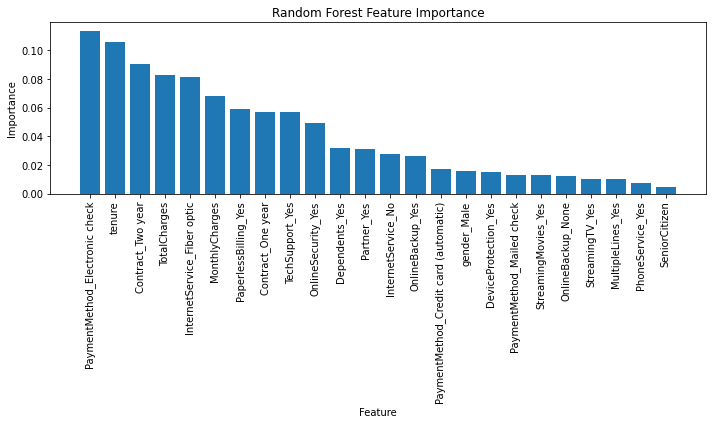

In [132]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


The three best features that impact the customer churn, are the payment method, tenure and the contract type. Senior Citizen has little impact on the model.

Based on this, we decided to try the model without the Senior Citizen column and evaluate the performance of the mode. Without the Senior Citizen column, the random forest model performed as follows.

## Random Forest model without Senior Citizen Column

In [ ]:
#Defining our tuned model 
rf_model_tuned_Sn = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [ ]:
#Dropping the Senior Citizen column in both the training and evaluation datasets
X_train_scaled_Sn = X_train_scaled.drop('SeniorCitizen',axis=1)
X_eval_scaled_Sn = X_eval_scaled.drop('SeniorCitizen',axis=1)

In [ ]:
#Fitting the model in the train dataset
rf_model_tuned_Sn.fit(X_train_scaled_Sn,y_train)

In [ ]:
#Predicting on the evaluation dataser
y_pred_Sn= rf_model_tuned_Sn.predict(X_eval_scaled_Sn)

In [ ]:
#Calculating the metrics
f1_rf = f1_score(y_pred_Sn, y_pred_rf)
accuracy_rf = accuracy_score(y_pred_Sn,y_pred_rf)


In [134]:
#Displaying the result
print(f'The f1 score for the random forest model with Senior Citizen column is: {f1_rf}')
print(f'\n The accuracy score for the random forest model without Senior Citizen column is: {accuracy_rf}')

The f1 score for the random forest model with Senior Citizen column is: 0.991486574983628

 The accuracy score for the random forest model without Senior Citizen column is: 0.9912339851652057


### Saving the Model

In [ ]:

final_model = 'Churn_Model.pkl'

pickle.dump(rf_model_tuned_Sn,open('final_model','wb'))

In [ ]:
#Loading the Model
final_model = pickle.load(open('final_model','rb'))

In [ ]:
final_model

### Expoting the Key Components

#### Requirements

In [ ]:
#Requirements file
!pip freeze > requirements.txt

### Object to Export

In [ ]:
components = {
    'label_encoder': label_encoder,
    'encoder': encoder,
    'scaler': scaler,
    'imbalance': smote,
    'grid_search_rfc':grid_search_rf,
    'model': rf_model_tuned_Sn
}

### Exporting the Model

In [ ]:
with open ('ML_Model.pkl', 'wb') as file:
    pickle.dump(components, file)

### Loading After Exporting the Model

In [ ]:
with open ('ML_Model.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

In [ ]:
#Checking on the Loaded objects
loaded_object

## Conclusion
In conclusion, customer churn is a significant challenge for the telecommunications industry, with a considerable proportion of customers discontinuing their services. The following insights can be drawn from the analysis regarding Vodafone telecommunication Company:

Tenure: The churn rate decreases as tenure increases, indicating that customers with longer tenures are less likely to churn. This suggests that customer loyalty tends to increase over time, indicating higher satisfaction and a stronger relationship with the company.

Payment Method: There is a correlation between the customer's payment method and churn rate. Customers using electronic check or mailed check as their payment method had higher churn rates, while those using bank transfer or credit card with automatic payment had lower churn rates. This suggests that customers using more automated and convenient payment methods may have higher satisfaction and loyalty.

Paperless Billing: Customers who opt for paperless billing have a higher churn rate compared to those who prefer traditional billing methods. This implies that customers who embrace digital and paperless processes may have different expectations or experiences that influence their decision to churn.

## Recommendations
Focus on customer retention strategies for new customers: Since customers with longer tenures are less likely to churn, it is crucial to implement strategies to enhance customer satisfaction and engagement during the early stages of their relationship with the company. Provide personalized onboarding experiences, exceptional customer support, and incentives to promote loyalty.


Offer incentives for automated payment methods: Encourage customers to use bank transfer or credit card with automatic payment by offering incentives such as discounts or rewards. This can promote customer convenience and increase loyalty.


Enhance paperless billing experience: Identify and address pain points or concerns related to paperless billing. Improve the user interface, provide clear communication about billing details, and offer additional benefits or rewards for customers who choose paperless billing.


Conduct customer satisfaction surveys: Regularly collect feedback from customers to understand their needs, preferences, and satisfaction levels. This can help identify areas for improvement and enable the company to take proactive measures to address customer concerns.


Implement targeted marketing campaigns. The company can Focus on educating customers about the benefits of the company's services, addressing common pain points, and highlighting the advantages of long-term relationships with the company.


Continuously monitoring and updating the churn prediction model. Customer churn patterns may evolve over time, so it's important to regularly monitor the performance of the predictive model and update them with new data. This will ensure that the model remain accurate and effective in predicting churn.

## References
Bartz-Beielstein, T., & Zaefferer, M. (2023). Hyperparameter tuning approaches. Hyperparameter Tuning for Machine and Deep Learning with R, 71-119. https://doi.org/10.1007/978-981-19-5170-1_4

Crisp dm - Google search. (n.d.). Google. https://www.google.com/search?sxsrf=APwXEdc766Sm1fRZINun8IIilYR4FPOFFg:1687712418116&q=crisp+dm&tbm=isch&sa=X&ved=2ahUKEwiHt6jZ8t7_AhVpSPEDHVL-BVYQ0pQJegQIDhAB&biw=1366&bih=592&dpr=1#imgrc=6YKkW8XCZfns4M

Ghoualmi, L., & Benkechkache, M. E. (2022). Feature selection based on machine learning algorithms: A weighted score feature importance approach for facial authentication. 2022 3rd International Informatics and Software Engineering Conference (IISEC). https://doi.org/10.1109/iisec56263.2022.9998240

Nababan, A. A., Sutarman, Zarlis, M., & Nababan, E. B. (2023). Improving the accuracy of k-nearest neighbor (k-NN) using synthetic minority Oversampling technique (SMOTE) and gain ratio (GR) for imbalanced class data. AIP Conference Proceedings. https://doi.org/10.1063/5.0128413

Vodafone. (2023). Who we are. Vodafone.com. https://www.vodafone.com/about-vodafone/who-we-are